# Chapter 1: Geometric Camera Model

In [1]:
import sys
sys.path.append('../')

### Homogeneous co-ordinates and tranformations

A function ``to_homogeneous`` converts a normal vector or matrix to its homogeneous form.

Means, given, a vector $(x_1, x_2)$, it converts it into $(x_1, x_2, 1)$.

It converts a matrix, given some translation vector $(x_0, y_0)$

$\mathcal{R}$ =
\begin{array}{cc}
1 & 2\\
3 & 4\\
\end{array}

$t$ = $(x_0, y_0)$

to its homogeneous matrix form like the one shown below

$\tau$ =
\begin{array}{cc}
1 & 2 & x_0\\
3 & 4 & y_0\\
0 & 0 & 1\\
\end{array}

In general, the conversion goes as follows

$\tau$ =
\begin{array}{cc}
\mathcal{R} & t\\
0 & 1\\
\end{array}

A non-homogeneous transformation is given by

$^{A}P = \mathcal{R}^{B}P + t$

where $\mathcal{R}^{B} \in \mathbb{R}^{3 \times 3}$ is the rotation matrix to move to the co-ordinate frame $A$, $t \in \mathbb{R}^{3}$, and $P \in \mathbb{R}^{3}$ is a point in co-ordinate frame $B$.

The equivalent homogeneous form is given by

$$^{A}P = \tau^{B}P$$

Let's see how does all of these translate to programming

In [2]:
# First, we will import the packages we are going to need 
# to do the computations
from cvma.utils import to_homogeneous
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We have a point $P = (1, 2)$

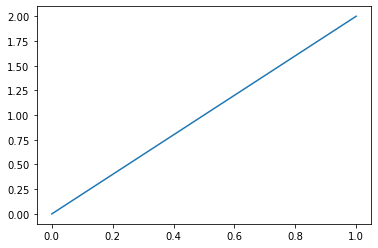

In [3]:
# Point in our co-ordinate system
point = np.array([1., 2.])
plt.plot([0., point[0]], [0., point[1]]);

Our rotation matrix looks like

\begin{array}{cc}
1 & 0\\
0 & 1\\
\end{array}

and the translation vector is $(0, 0)$ which means we are not actually changing the co-ordinate frame. Hence, we sould get the same output when we transform $P$ using this rotation and translation vector. Let's see!

In [4]:
# Let's first define our translation vector and rotation matrix
rotation_matrix_b = np.array([[1., 0.], [0., 1.]])
translation_vector = np.array([0., 0.])

# Let's tranform the point P we previously defined.
# @ => Matrix multiplication
a_point = rotation_matrix_b @ point + translation_vector

# Voila! We gat the same output as P. This was expected as
# we actually are not applying any transformation but checking
# if the transformation eauation works!
print(a_point)

[1. 2.]


Now, let's try to perform the same tranformation but in homogeneous co-ordinates.

We can use the function ``to_homogeneous`` to convert any vector or matrix to its homogeneous form

In [5]:
tau_b = to_homogeneous(rotation_matrix_b, translation_vector)
point_homogeneous = to_homogeneous(point)

In [6]:
a_point_homogeneous = tau_b @ point_homogeneous
print(a_point_homogeneous[:-1])

[1. 2.]


In [7]:
print(to_homogeneous.__doc__)

Convert a vector or matrix to its homogeneous form

    Converts a vector [x1, x2, ..., xn] to [x1, x2, ..., xn, 1]
    Converts a matrix
    [[x11, x12, ..., x1n],
     [x21, x22, ..., x2n],
     ...
     [xm1, xm2, ..., xmn]]
    to
    [[x11, x12, ..., x1n, aux1],
     [x21, x22, ..., x2n, aux2],
     ...
     [xm1, xm2, ..., xmn, auxm],
     [  0,   0, ...,   0,    1]]
    where matrix_auxilary_entries = [aux1, aux2, ..., auxm]

    Parameters
    -----
    data: array-like of shape (m, ) or (m, n)
        The vector or matrix to be converted into its homogeneous form
    
    matrix_auxilary_entries: array-like of shape (m, )
        The auxilary entries of the last column of transformed matrix
    
    Returns
    -----
    Transformed vector or matrix to its homogeneous form

    Note
    -----
    Arrays of shape (m, ), (m, 1), and (1, m) are considered equivalent.
    Note also that the dtype of data is only considered during transformation
    If the dtype of matrix_auxilary_